# Qaintellect Training Example

In this example, we will demonstrate the optimisation of a quantum circuit using Qaintellect's Flux integration.

In [1]:
include("../src/Qaintellect.jl")
using .Qaintellect
using Flux, LinearAlgebra, Test
using Flux.Optimise: update!
using IterTools: ncycle

┌ Warning: `haskey(::TargetIterator, name::String)` is deprecated, use `Target(; name = name) !== nothing` instead.
│   caller = llvm_compat(::VersionNumber) at compatibility.jl:176
└ @ CUDAnative /home/ga53vuw/.julia/packages/CUDAnative/C91oY/src/compatibility.jl:176


## Task: Flipping A Qubit
In the first task, we would like to optimize a circuit such that it flips a qubit from state $\lvert 0 \rangle$ to $\rvert 1 \rangle$. We begin by constructing a simple circuit consisting of two rotation gates: an $R_{x}$ gate and an $R_{y}$ gate

<div>
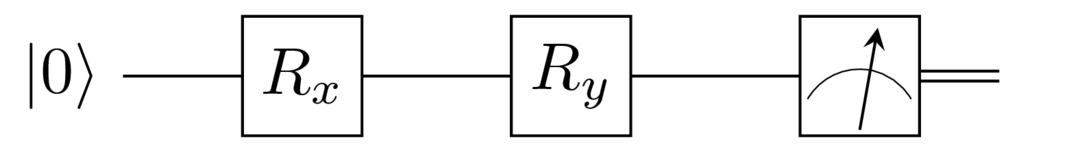
</div>

where:

$$
R_{x}(\phi_{1}) = \left( \begin{array}{cc} cos\frac{\phi_{1}}{2}& -isin\frac{\phi_{1}}{2}\\ -sin\frac{\phi_{1}}{2}& cos\frac{\phi_{1}}{2} \end{array} \right)\\
R_{y}(\phi_{2}) = \left( \begin{array}{cc} cos\frac{\phi_{2}}{2}& -sin\frac{\phi_{2}}{2}\\ sin\frac{\phi_{2}}{2}& cos\frac{\phi_{2}}{2} \end{array} \right)
$$

We create Qaintessent $R_{x}$ and $ R_{y}$ AbstractGate objects. We randomize the initial rotation angles for these gates.

In [2]:
N = 1
ϕ1 = rand(Float64, 1)
rx = RxGate(ϕ1...)
println("ϕ1 is: " * string(ϕ1))

ϕ2 = rand(Float64, 1)
ry = RyGate(ϕ2...)
println("ϕ2 is: " * string(ϕ2))

ϕ1 is: [0.3002456513519929]
ϕ2 is: [0.9152706114036158]


Then, we setup the Circuit object using these gates. We use the Pauli-$Y$ matrix as an observable, noting that measuring with this observable yields $-1$ when measuring the target $ \lvert 1 \rangle$ state.

In [3]:
cgc = CircuitGateChain{N}([
    single_qubit_circuit_gate(1, rx, N),
    single_qubit_circuit_gate(1, ry, N),
])

# Using pauli-y matrix as observable
meas = MeasurementOps{N}([1 0; 0 -1])

c = Circuit(cgc, meas)


    1 —[Rx]——[Ry]—


We set the initial input as the $\lvert 0 \rangle$ state, and the targetted expectation value of the measurement as $-1$.

In [4]:
ψ = ComplexF64[1.0, 0.0]
e = -1

-1

Now, we define a cost function `loss()` using the Flux mean-squared error function. We also gather the trainable params from our created circuit using the Flux.params function. We arbitrarily choose the simple Flux Descent optimizer. We also create the `evalcb()` to intermittently output the loss of our cost function.

In [5]:
# create loss function
loss(x,y) = Flux.mse(c(x), y)

# gather parameters from Circuit
paras = Flux.params(c)

# define optimizer
opt = Descent(1.5)

Descent(1.5)

Finally, we use `ncycle()` to repeatedly feed our input quantum state into the training scheme and start the training.

In [6]:
for i in 1:500
    gs = gradient(() -> loss(ψ, e), paras)
    Flux.update!(opt, paras, gs)
    println("Cost: " * string(loss(ψ, e)))
end

for gate in c.cgc
    println(gate)
end

Cost: 0.8445186521680382
Cost: 0.054845671604185506
Cost: 0.0013297491080084783
Cost: 0.0008485060477770213
Cost: 0.0005938484417622973
Cost: 0.0004410469036802286
Cost: 0.0003415266737963168
Cost: 0.0002728183115898826
Cost: 0.00022325880832168955
Cost: 0.00018626711337136365
Cost: 0.00015788548619319754
Cost: 0.00013561078220097086
Cost: 0.00011779364245821762
Cost: 0.00010330967916631466
Cost: 9.137004354844666e-5
Cost: 8.140750547489644e-5
Cost: 7.300539757440777e-5
Cost: 6.5851879590707e-5
Cost: 5.97096826879947e-5
Cost: 5.4395606110170006e-5
Cost: 4.9766322562003086e-5
Cost: 4.570836174554817e-5
Cost: 4.213091985130208e-5
Cost: 3.896061697998455e-5
Cost: 3.613762050389946e-5
Cost: 3.361274132820445e-5
Cost: 3.1345233064175915e-5
Cost: 2.9301105743421387e-5
Cost: 2.7451820753257213e-5
Cost: 2.577327138316851e-5
Cost: 2.4244979574413013e-5
Cost: 2.28494579120824e-5
Cost: 2.1571699047555096e-5
Cost: 2.039876421772871e-5
Cost: 1.931944943412451e-5
Cost: 1.83240129977681e-5
Cost: 1.74

Cost: 1.9304680919098477e-7
Cost: 1.920313631846439e-7
Cost: 1.9102391243905559e-7
Cost: 1.9002437320438896e-7
Cost: 1.8903266282569877e-7
Cost: 1.8804869972425837e-7
Cost: 1.8707240338288518e-7
Cost: 1.8610369432589596e-7
Cost: 1.8514249410706946e-7
Cost: 1.8418872529041672e-7
Cost: 1.8324231143634046e-7
Cost: 1.8230317708588204e-7
Cost: 1.8137124774621216e-7
Cost: 1.8044644987413614e-7
Cost: 1.795287108633892e-7
Cost: 1.786179590295553e-7
Cost: 1.7771412359583465e-7
Cost: 1.7681713468057922e-7
Cost: 1.7592692328125745e-7
Cost: 1.7504342126355068e-7
Cost: 1.7416656134817157e-7
Cost: 1.7329627709590686e-7
Cost: 1.7243250289737075e-7
Cost: 1.7157517395938503e-7
Cost: 1.7072422629281626e-7
Cost: 1.6987959670166235e-7
Cost: 1.6904122276971535e-7
Cost: 1.6820904285012508e-7
Cost: 1.673829960547251e-7
Cost: 1.6656302223977299e-7
Cost: 1.6574906199946647e-7
Cost: 1.6494105665141197e-7
Cost: 1.641389482279469e-7
Cost: 1.633426794655889e-7
Cost: 1.625521937934495e-7
Cost: 1.617674353253638e-7


We can then verify that our trained circuit now produces the required output.

In [7]:
@test apply(c, ψ)[1] ≈ -1.0 rtol=1e-3

Test Passed